# Extract & Analyze climate data from NCEI

How to extract data

1. Use NOAA's API Request
2. Download manually from homepage

In [1]:
import os
import sys
import time
import pandas as pd
from datetime import datetime, timedelta
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns


# Add project path to os.path
current_path = os.path.abspath('.')
project_name = 'California_Wild_Fire_Prediction'
project_path = os.path.join(current_path.split(project_name)[0], project_name)
sys.path.append(project_path)
load_dotenv('.env')

False

# Data Extract

In [2]:
data_path = os.path.join(project_path, 'data/climate_data')
df = pd.DataFrame()
for data_name in os.listdir(data_path):
    df = pd.concat([df, pd.read_csv(os.path.join(data_path, data_name))])

df['DATE'] = pd.to_datetime(df['DATE'])
df = df.sort_values(by=['DATE', 'STATION'])
df.to_csv(f"data/climate_data/climate_data.csv")

/var/folders/ns/shg9ht0545sbbr41sk4q_zgr0000gn/T/ipykernel_72028/4073464176.py:4: DtypeWarning: Columns (7,11,15,17,19,23,25,27,33,35,37,47,49,51,53,55,57,59,61,63,65,69,71,73,75,77,79,81,83,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([df, pd.read_csv(os.path.join(data_path, data_name))])
/var/folders/ns/shg9ht0545sbbr41sk4q_zgr0000gn/T/ipykernel_72028/4073464176.py:4: DtypeWarning: Columns (7,11,15,17,19,23,25,27,33,35,37,47,49,51,53,55,57,59,61,63,65,69,71,73,75,77,79,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([df, pd.read_csv(os.path.join(data_path, data_name))])
/var/folders/ns/shg9ht0545sbbr41sk4q_zgr0000gn/T/ipykernel_72028/4073464176.py:4: DtypeWarning: Columns (7,11,15,17,19,23,25,27,33,35,37,47,49,51,53,55,57,59,61,63,65,67,69,71,75,79,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([df, pd.read_csv(os.path.join(data_path, 

OSError: Cannot save file into a non-existent directory: 'data/climate_data'

# Data Explore

In [ ]:
min_date = df['DATE'].min()
max_date = df['DATE'].max()

print(f"Data is from {min_date} to {max_date}")

Data is from 2021-11-01 00:00:00 to 2024-10-31 00:00:00


In [ ]:
df.head(4)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,DAPR,DAPR_ATTRIBUTES,...,WT07,WT07_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT09,WT09_ATTRIBUTES,WT11,WT11_ATTRIBUTES,WT10,WT10_ATTRIBUTES
14937,US1CAAL0001,"PIEDMONT 1.0 SE, CA US",37.812300,-122.216000,113.4,2021-11-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15104,US1CAAL0003,"CASTRO VALLEY 0.4 NNE, CA US",37.716904,-122.058526,163.4,2021-11-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12255,US1CAAL0004,"PLEASANTON 1.8 SSE, CA US",37.648266,-121.874518,107.0,2021-11-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12750,US1CAAL0012,"PLEASANTON 0.4 ESE, CA US",37.670200,-121.881400,104.9,2021-11-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that many columns are Nan (Null).

This is because some stations have various equipments to measure data, where most of the station don't have.

So we are going to look for stations with many data

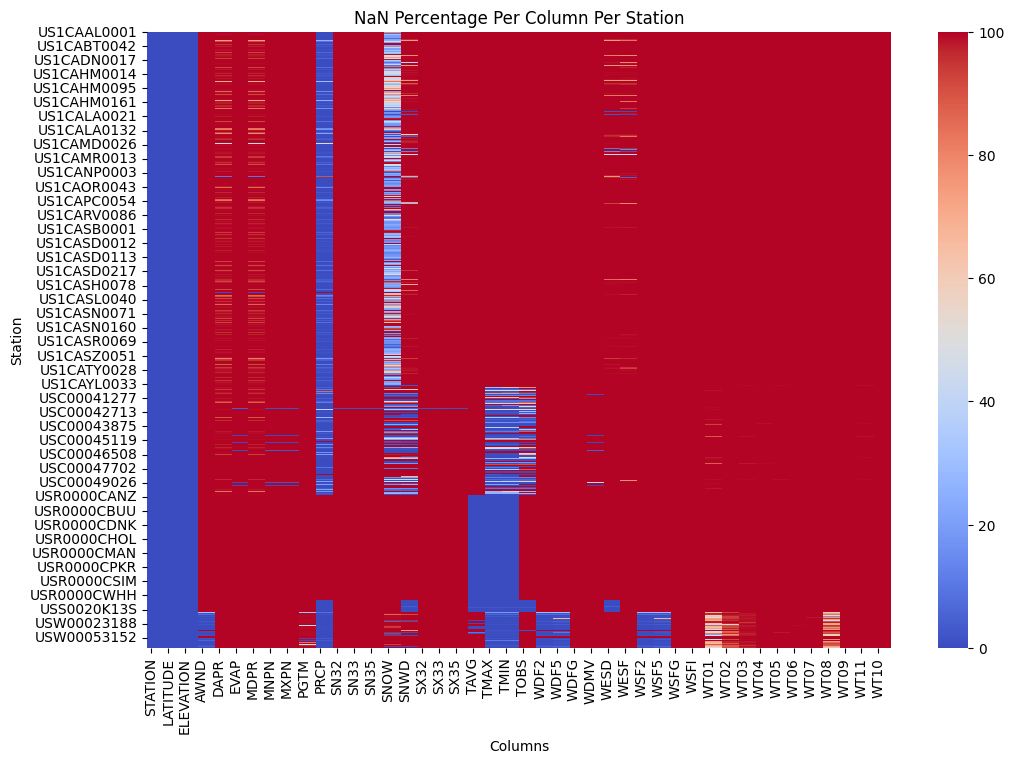

In [ ]:
nan_percentage_per_station = df.groupby("STATION").apply(lambda x: x.isna().mean() * 100)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(nan_percentage_per_station, cmap="coolwarm", annot=False, cbar=True)

# Formatting
plt.title("NaN Percentage Per Column Per Station")
plt.xlabel("Columns")
plt.ylabel("Station")
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()

3 stations - AWND, PRCP, TMAX, TMIN, WSF2, WSF5, WDF2, WDF5

8 stations - TAVG, TMAX, TMIN

-> use 11 stations will be okay

1. Stations with TMAX, TMIN, TAVG

In [29]:
import folium

# Create a map centered in California
m = folium.Map(location=[37.5, -119.5], zoom_start=6)  # Centering around California

# Add station markers
for _, row in df[['STATION', 'LATITUDE', 'LONGITUDE']].drop_duplicates().iterrows():
    station = row["STATION"]
    if station not in [
        'USR0000CANZ',
        'USR0000CBUU',
        'USR0000CDNK',
        'USR0000CDNK',
        'USR0000CHOL',
        'USR0000CMAN',
        'USR0000CPKR',
        'USR0000CSIM',
        'USR0000CWHH',
    ]:
        continue
    folium.Marker(
        location=[row["LATITUDE"], row["LONGITUDE"]],
        popup=row["STATION"],
        icon=folium.Icon(color="blue", icon="cloud")
    ).add_to(m)

# Save map to file
m.save("california_stations_map.html")

# Show the map inline (if using Jupyter Notebook)
m

2. Stations with more values

In [30]:
# Create a map centered in California
m = folium.Map(location=[37.5, -119.5], zoom_start=6)  # Centering around California

# Add station markers
for _, row in df[['STATION', 'LATITUDE', 'LONGITUDE']].drop_duplicates().iterrows():
    station = row["STATION"]
    if station not in [
        'USS0020K13S',
        'USW00023188',
        'USW00053152'
    ]:
        continue
    folium.Marker(
        location=[row["LATITUDE"], row["LONGITUDE"]],
        popup=row["STATION"],
        icon=folium.Icon(color="blue", icon="cloud")
    ).add_to(m)

# Save map to file
m.save("california_stations_map.html")

# Show the map inline (if using Jupyter Notebook)
m



In [12]:
df_final = df[df['STATION'].isin(['USS0020K13S','USW00023188','USW00053152'])]
df_final_preprocessed = df_final[['STATION', 'LATITUDE', 'ELEVATION', 'AWND', 'PRCP', 'TMAX', 'TMIN', 'WSF2', 'WSF5', 'WDF2', 'WDF5']]

In [13]:
df_final_preprocessed.to_csv(f"{project_path}/data/climate_data/preprocessed_climate_data.csv")